In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# TASK 1
df=pd.read_csv("communities.txt", header = None)

In [3]:
header=pd.read_csv("attributes.csv")
header

,attributes
0,state
1,county
2,community
3,communityname
4,fold
...,...
123,LemasPctPolicOnPatr
124,LemasGangUnitDeploy
125,LemasPctOfficDrugUn
126,PolicBudgPerPop


In [4]:
Header=header['attributes'].to_list()

In [5]:
df.columns = Header
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [6]:
df= df.replace('?',np.nan)
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [7]:
df1= df.drop(['state  ', 'county  ', 'community  ', 'communityname', 'fold  '], axis = 1)
df1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [8]:
df1=df1.dropna(axis=0)
df1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,1.00,0.07,0.15,1,0.35,0.73,0,0.31,0.21,0.69
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.16,0.12,0.07,0.04,0.01,0.81,1,0.56,0.09,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.00,0.29,0.21,0.29,1.00,0.26,0.24,0.47,0.28,0.46,...,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35,0.75
1981,0.07,0.38,0.17,0.84,0.11,0.04,0.35,0.41,0.30,0.64,...,0.09,0.13,0.17,0.02,0.01,0.72,0,0.62,0.15,0.07
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [9]:
# TASK 2
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [12]:
from sklearn.linear_model import Ridge
myRidge = Ridge(alpha=1).fit(X_train, y_train)
prediction = myRidge.predict(X_test)

In [14]:
# TASK 3
import math
print("MSE",mean_squared_error(y_test, prediction))
print("RMSE",math.sqrt(mean_squared_error(y_test, prediction)))

MSE 0.028228468402190305
RMSE 0.16801329828971964


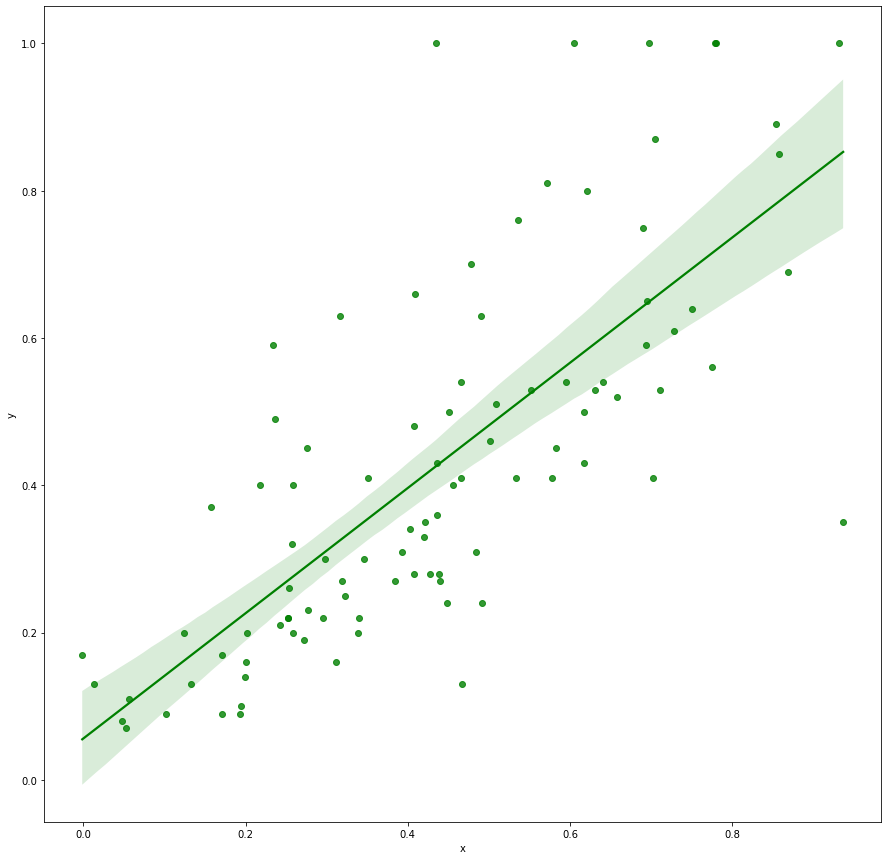

In [15]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.regplot(x=prediction,y=y_test, color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
# TASK 4
alpha=np.linspace((1/10**10),10**10,20)
# mse=[]
# for i in alpha:
#     myRidge = Ridge(alpha=1).fit(X_train, y_train)
#     prediction = myRidge.predict(X_test)
#     MSE=mean_squared_error(y_test, prediction)
#     mse.append(MSE)
# mse
alpha

array([1.00000000e-10, 5.26315789e+08, 1.05263158e+09, 1.57894737e+09,
       2.10526316e+09, 2.63157895e+09, 3.15789474e+09, 3.68421053e+09,
       4.21052632e+09, 4.73684211e+09, 5.26315789e+09, 5.78947368e+09,
       6.31578947e+09, 6.84210526e+09, 7.36842105e+09, 7.89473684e+09,
       8.42105263e+09, 8.94736842e+09, 9.47368421e+09, 1.00000000e+10])

In [20]:
alpha=[]
for i in range(-10,11):
    alpha.append(10**(i))
alpha

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000,
 10000000000]

In [22]:
mse=[]
for i in alpha:
    myRidge = Ridge(alpha=i).fit(X_train, y_train)
    prediction = myRidge.predict(X_test)
    MSE=mean_squared_error(y_test, prediction)
    mse.append(MSE)
mse

[0.04986344072436858,
 0.04986331920969783,
 0.04986210477155852,
 0.04985003096676275,
 0.04973597157377815,
 0.04901744657648736,
 0.047549284373165766,
 0.04319100490502372,
 0.03554208387438408,
 0.02941734789704589,
 0.028228468402190305,
 0.028302512735454134,
 0.03189424438743385,
 0.05078424162609781,
 0.061071147202091114,
 0.062493326753902144,
 0.06264081341197397,
 0.06265561651935914,
 0.06265709737632275,
 0.06265724546748318,
 0.06265726027665386]

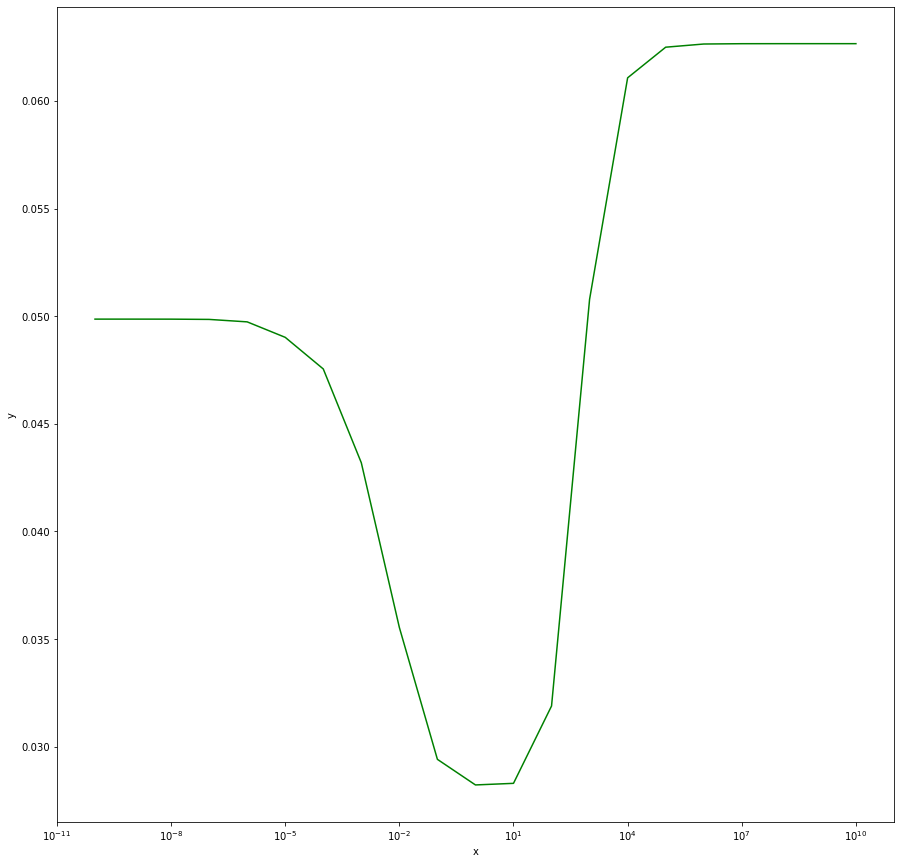

In [32]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.lineplot(x=alpha,y=mse, color='g')
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The MSE is lowest for regularization strenght alpha = 1.

In [81]:
# TASK 5
from sklearn.linear_model import Lasso
mylasso= Lasso(alpha=50).fit(X_train, y_train)

In [82]:
prediction= mylasso.predict(X_test)
prediction

array([0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829596,
       0.44829596, 0.44829596, 0.44829596, 0.44829596, 0.44829

In [84]:
print('MSE: ',mean_squared_error(y_test, prediction))

MSE:  0.06265726192211787


In [85]:
print('MAE: ',mean_absolute_error(y_test, prediction))

MAE:  0.2062429932735426


In [86]:
print('RMSE: ',np.sqrt(mean_squared_error(y_test, prediction)))

RMSE:  0.2503143262422626


In [87]:
mylasso.score(X_test,prediction)

1.0

In [88]:
mylasso.coef_

array([ 0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,
       -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.])

In [89]:
mylasso1= Lasso(alpha=10).fit(X_train, y_train)

In [90]:
mylasso1.coef_

array([ 0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,
       -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.])

Regularization strenght does not affect the number of non-zero co-efficients.